# Проект 2. Разведывательный анализ данных  

## Цель проекта
провести разведовательный анализ данных, определив влияния условий жизни учащихся на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
### Задачи:
1. Провести первичную обработку данных
2. Посмотреть на распределение признака для числовых переменных, устранить выбросы.
3. Оценить количество уникальных значений для номинативных переменных.
4. По необходимости преобразовать данные
5. Провести корреляционный анализ количественных переменных
6. Отобрать не коррелирующие переменные
7. Проанализировать номинативные переменные и устраните те, которые не влияют на предсказываемую величину — на переменную score
8. Сформулировать выводы относительно качества данных и тех переменных, которые будут использоваться в дальнейшем построении модели.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

math = pd.read_csv('stud_math.csv')

In [2]:
math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [3]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
# Отбросим столбец с неизвестными данными 'studytime, granular'
math.drop(['studytime, granular'], inplace=True, axis=1)

In [5]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

=> Числовых столбцов 12, строковых 17. Большинство числовых столбцов не носят числовой информации и их следует преобразовать к строковому типу, чтобы работать с ними как с номинативнми признаками.
Полностью заполнены только первые 3 колонки. 
Тем не менее, данные выглядят достаточно полными: максимальное отсутствие в столбцах не превышает даже 9%. Поэтому для номинативных переменных пропуски предлагается заполнить типичными значениями в соответствии с существующим распределением в каждой конкретной колонке. Пустые значения в числовых колонках предлагается заполнить медианными значениями. Но принимая во внимание, что пустые значения останутся только в колонках absences и score (6 шт.), то пустые строки в зависимой переменной можно просто удалить, что не сильно скажется на результате. Сделаем последний пункт сразу.

In [6]:
math.dropna(subset=['score'], inplace=True)

In [7]:
math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     374 non-null    object 
 4   famsize     362 non-null    object 
 5   Pstatus     344 non-null    object 
 6   Medu        386 non-null    float64
 7   Fedu        365 non-null    float64
 8   Mjob        370 non-null    object 
 9   Fjob        353 non-null    object 
 10  reason      372 non-null    object 
 11  guardian    358 non-null    object 
 12  traveltime  361 non-null    float64
 13  studytime   382 non-null    float64
 14  failures    367 non-null    float64
 15  schoolsup   380 non-null    object 
 16  famsup      351 non-null    object 
 17  paid        350 non-null    object 
 18  activities  375 non-null    object 
 19  nursery     374 non-null    o

Такое чувство, что индексы поползли, проверим

In [8]:
math.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            385, 386, 387, 388, 389, 390, 391, 392, 393, 394],
           dtype='int64', length=389)

Так и есть. Попраим их

In [9]:
math.index = [i for i in range(389)]

In [10]:
math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 388
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     374 non-null    object 
 4   famsize     362 non-null    object 
 5   Pstatus     344 non-null    object 
 6   Medu        386 non-null    float64
 7   Fedu        365 non-null    float64
 8   Mjob        370 non-null    object 
 9   Fjob        353 non-null    object 
 10  reason      372 non-null    object 
 11  guardian    358 non-null    object 
 12  traveltime  361 non-null    float64
 13  studytime   382 non-null    float64
 14  failures    367 non-null    float64
 15  schoolsup   380 non-null    object 
 16  famsup      351 non-null    object 
 17  paid        350 non-null    object 
 18  activities  375 non-null    object 
 19  nursery     374 non-null    o

Теперь всё нормально :)

Опишем функции для преобразования колонок

In [11]:
def column_to_nominate(column):
    """Преобразовываем вещественные значения колонки в строку,
       тем самым создавая номинативный признак"""

    math[column] = math[column].apply(
        lambda x: None if pd.isnull(x) else str(round(x)))


def adding_new_values(column):
    """Заменяем отсутствующие значения номинативной переменной
       в соотношении существующих значений"""

    mask = math[column].isna()
    # считаем статистику распределения значений
    p = math[column].value_counts() / len(math[column].dropna())
    # заполняем пропуски с вероятностью `p`
    math.loc[mask, column] = np.random.choice(
        p.index.to_list(), size=mask.sum(), p=p.to_list())


def get_boxplot(column):
    """Выводим boxplot"""

    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score', data=math.loc[math.loc[:, column].isin(
        math.loc[:, column].value_counts().index)], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def show_info(column):
    """Выводим информацию о признаке, строим boxplot и гистограмму"""

    print(math[column].value_counts())
    print(math[column].value_counts().sum())
    math[column].hist()
    get_boxplot(column)


def get_stat_dif(column):
    """Поиск статистических различий"""

    cols = math.loc[:, column].value_counts()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'],
                     math.loc[math.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

Преобразуем Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, health в номинативный вид

In [12]:
for column in ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health']:
    column_to_nominate(column)

Заполняем мединным значением колонку пропусков занятий absences и для удобства преобразуем её к целому типу

In [13]:
math['absences'] = math['absences'].apply(lambda x: int(
    round(math['absences'].median())) if pd.isnull(x) else int(round(x)))

Проанализируем каждый столбец на наличие выброс и при необходимости произведём замену или удаление выбросов. Начнём с целевой зависимой переменной score

<AxesSubplot:>

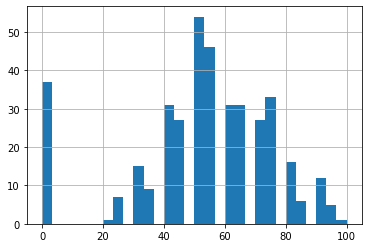

In [14]:
math.score.hist(bins=30)

In [15]:
math.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Учитывая достаточное количество нулей аж 37, а также то, что никто не получил оценки 5, 10, 15, предположим, что 37 нулей – это выбросы. Заменим их случайными величинами в имеющемся соотношении

In [16]:
# Заменяем 0 на None, чтобы использовать функцию adding_new_values
math.score = math.score.apply(lambda x: None if x == 0 else x)
# Заполняем None другими оценками в том же соотношении, что и все остальные
adding_new_values('score')
# преобразуем столбец к целочисленному виду
math.score = math.score.apply(lambda x: int(x))

<AxesSubplot:>

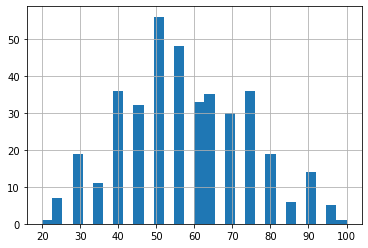

In [17]:
math.score.hist(bins=30)

Распеределение похоже на нормальное

GP    344
MS     45
Name: school, dtype: int64
389


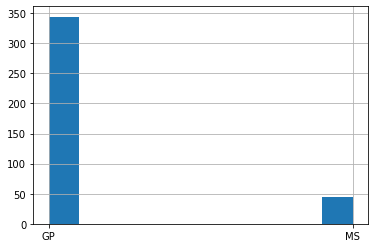

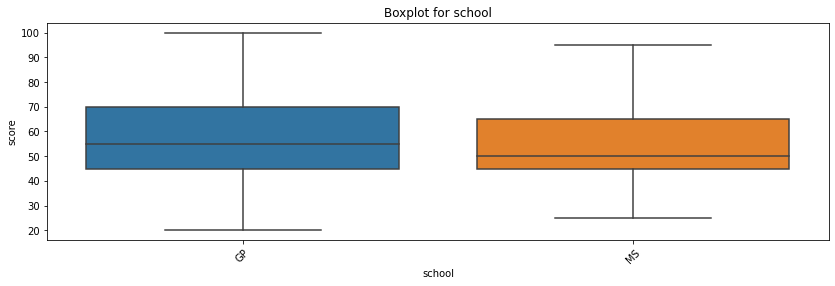

In [18]:
show_info('school')

F    204
M    185
Name: sex, dtype: int64
389


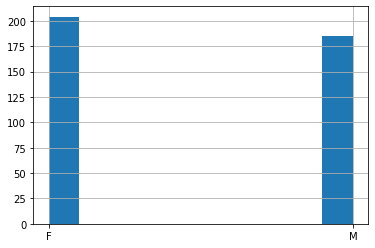

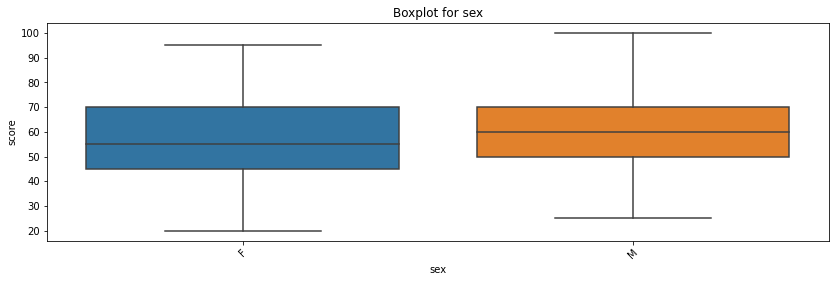

In [19]:
show_info('sex')

16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64
389


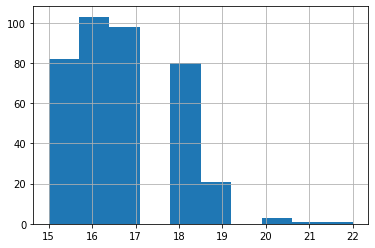

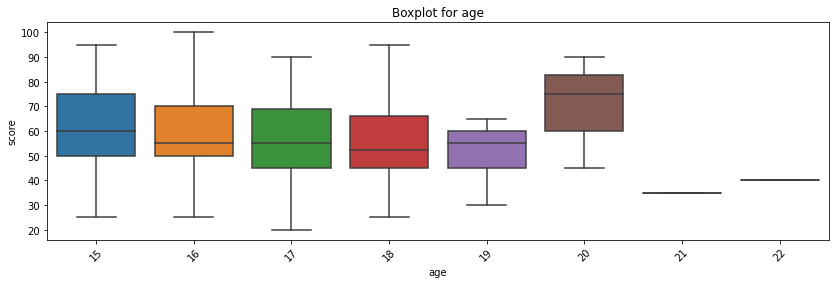

In [20]:
show_info('age')

Видно, что "возрастных" учеников 20-22 всего 5 человек. Штучное количество может в будущем внести неточность. Поэтому предлагается удалить этих "учеников". Также интересно, что медионное значение находится практически на одном уровне, что может говорить о том, что в каждой возрастной группе практически одинаковое количество "серядняков"

In [21]:
math = math[math.age <= 19]

16    103
17     98
15     82
18     80
19     21
Name: age, dtype: int64
384


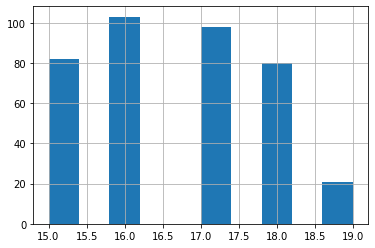

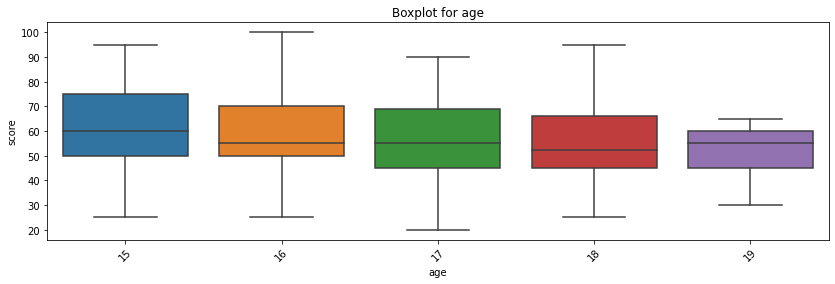

In [22]:
show_info('age')

U    288
R     82
Name: address, dtype: int64
370


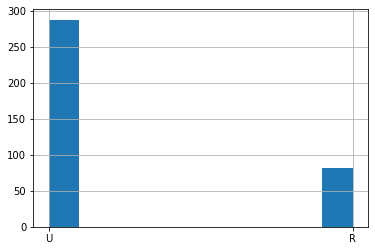

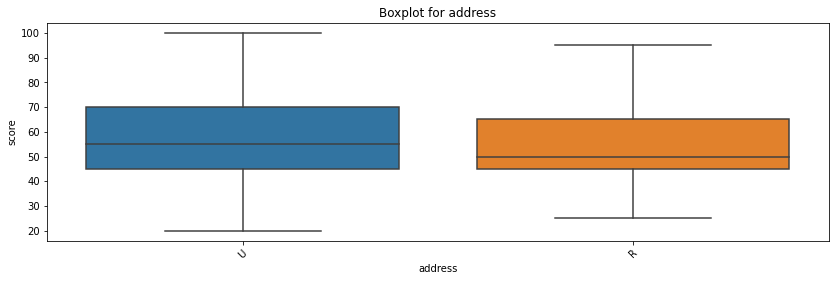

In [23]:
show_info('address')

GT3    251
LE3    106
Name: famsize, dtype: int64
357


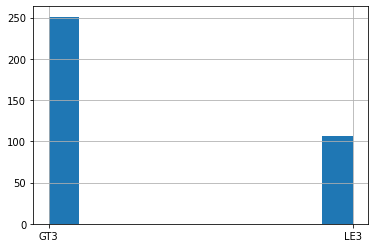

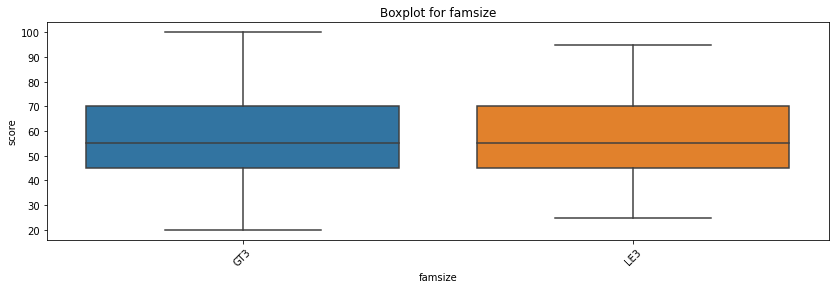

In [24]:
show_info('famsize')

T    305
A     34
Name: Pstatus, dtype: int64
339


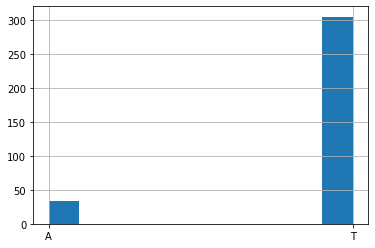

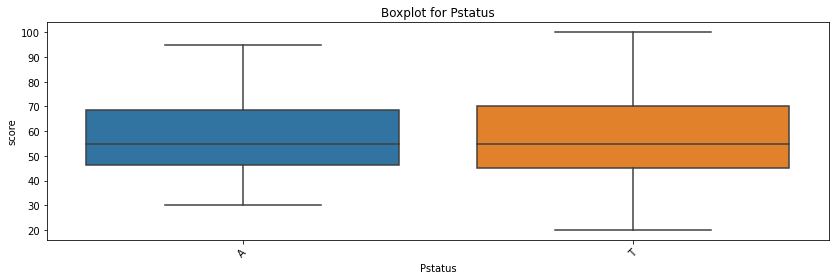

In [25]:
show_info('Pstatus')

Интересно, что 2 наивысшие оценки получили те учащиеся, кто живёт отдельно от родителей. Учитывая штучное количество, это может быть простая случайность. А может и бОльшая самостоятельность)

4    130
2     99
3     94
1     55
0      3
Name: Medu, dtype: int64
381


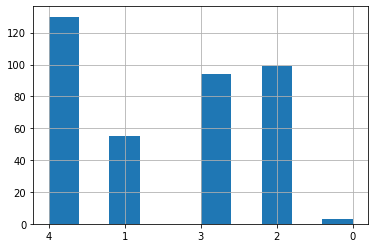

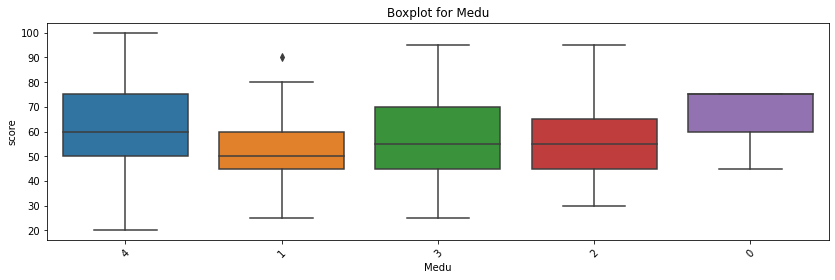

In [26]:
show_info('Medu')

Всего у троих матерей нет никакого образования. Удалим эту информацию как выбросы. Также стоит заметить, что у учащихся с высшим образованием матери чаще оценки выше среднего.

4    130
2     99
3     94
1     55
Name: Medu, dtype: int64
378


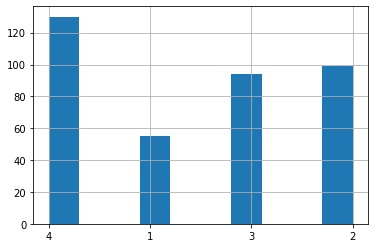

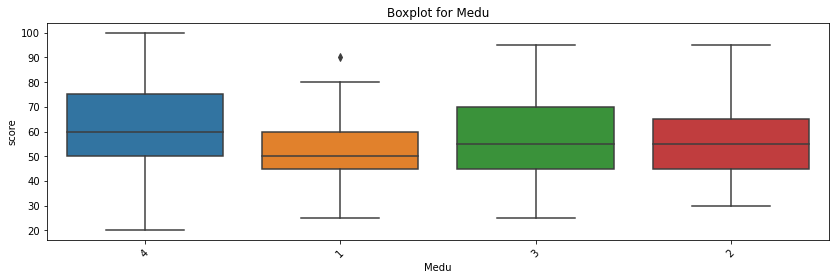

In [27]:
math = math[math.Medu != '0']
show_info('Medu')

2     100
3      94
4      88
1      72
0       2
40      1
Name: Fedu, dtype: int64
357


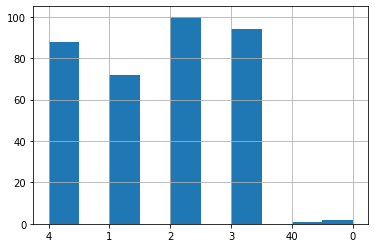

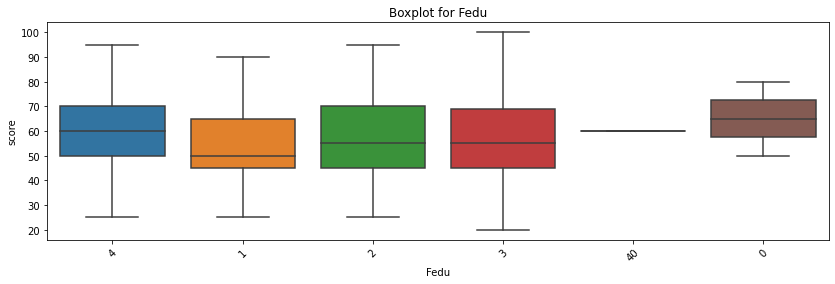

In [28]:
show_info('Fedu')

Исправим опечатку 40 на 4 и удалим "необразованных пап", так как их очень мало.

2    100
3     94
4     89
1     72
Name: Fedu, dtype: int64
355


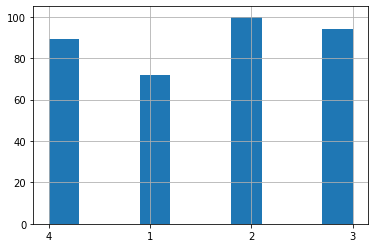

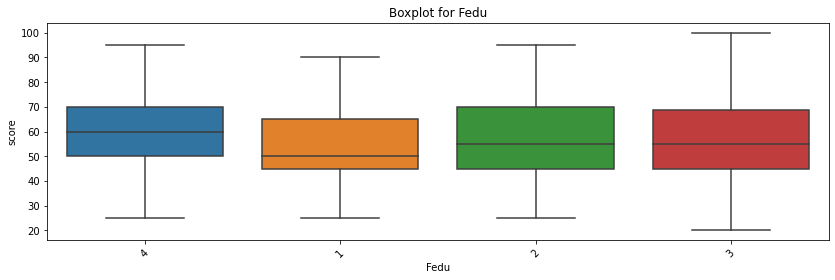

In [29]:
math.loc[math[math.Fedu == '40'].index[0], 'Fedu'] = '4'
math = math[math.Fedu != '0']
show_info('Fedu')

Тут как и в случае с мамами, у более образованных отцов, обычно дети получают оценки лучше.

other       124
services     95
at_home      56
teacher      54
health       31
Name: Mjob, dtype: int64
360


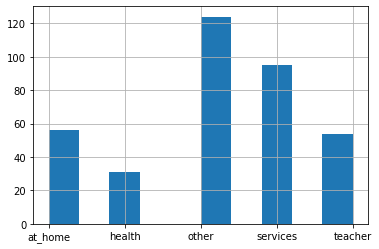

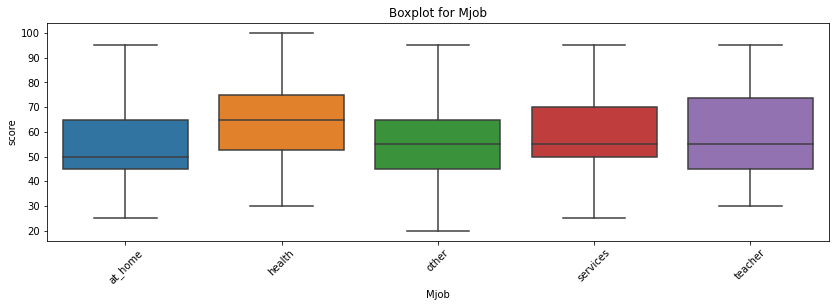

In [30]:
show_info('Mjob')

Удивительно, что у неработающих матерей дети обычно хуже учатся по математике. Тогда как у матерей, работающих в здравоохранении дети получают оценки по точной науке обычно выше. Также мама-учитель оказывается вовсе не показатель лучшей оценки по математике)

other       187
services     97
teacher      29
health       15
at_home      15
Name: Fjob, dtype: int64
343


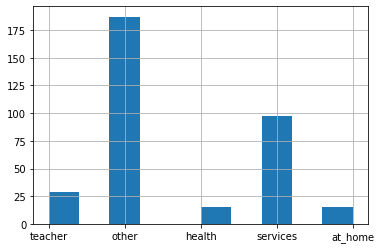

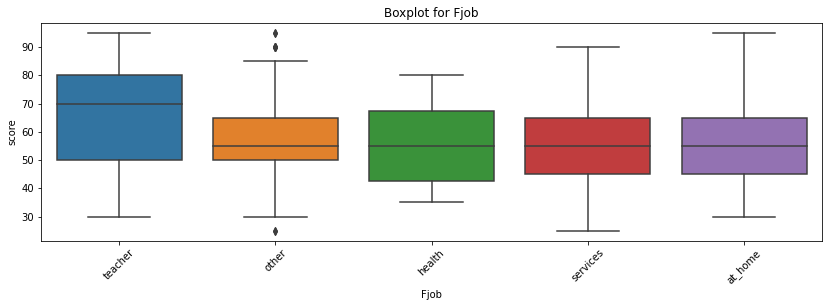

In [31]:
show_info('Fjob')

course        129
reputation    101
home          100
other          32
Name: reason, dtype: int64
362


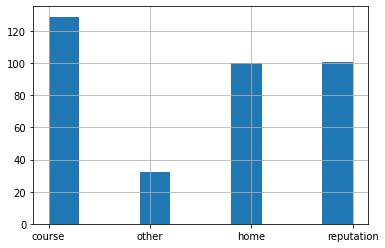

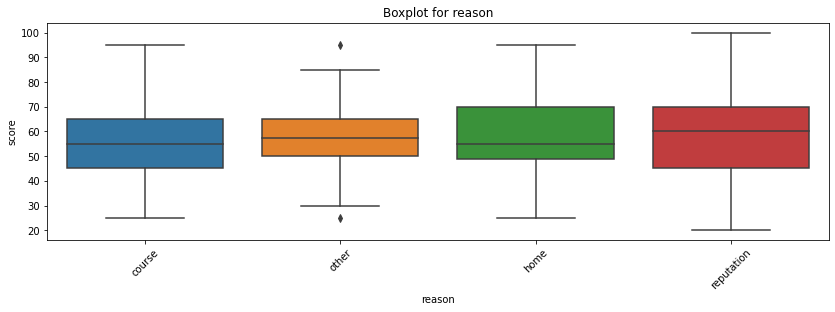

In [32]:
show_info('reason')

Причина выбора школы скорее всего не влияет на итоговые оценки по математике

mother    244
father     85
other      22
Name: guardian, dtype: int64
351


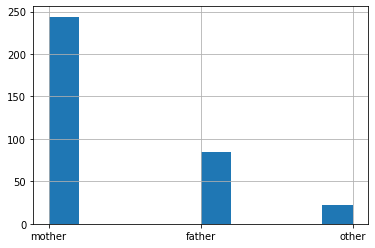

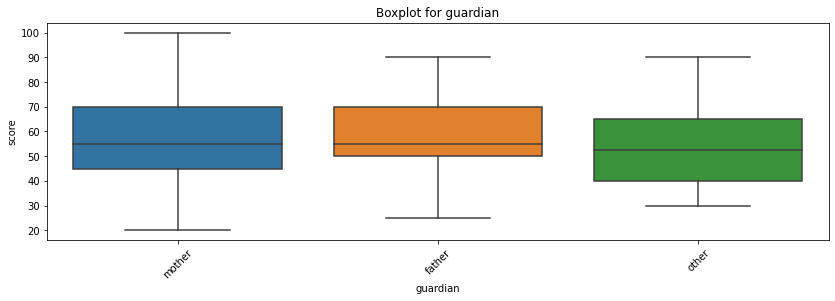

In [33]:
show_info('guardian')

1    233
2     90
3     21
4      7
Name: traveltime, dtype: int64
351


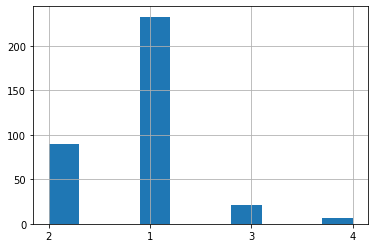

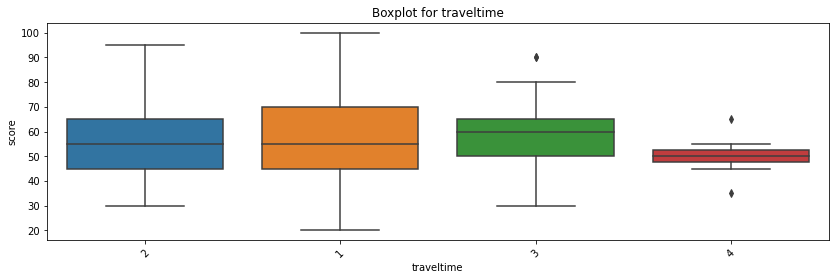

In [34]:
show_info('traveltime')

2    186
1     99
3     61
4     26
Name: studytime, dtype: int64
372


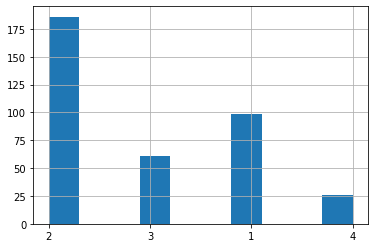

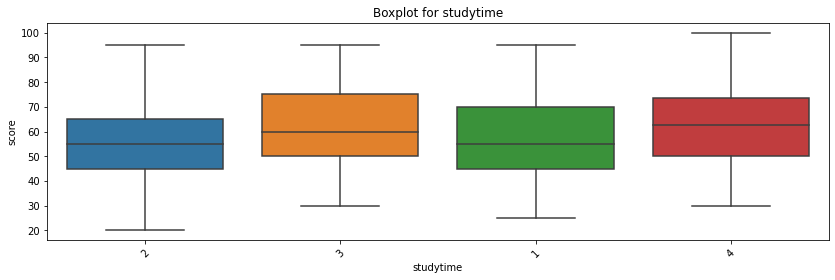

In [35]:
show_info('studytime')

Заметно, что обычно те ученики, которые тратят на учёбу помимо школы более 5 часов в неделю, имеют лучшие оценки по математике, чем те, кто тратит меньшее время на учёбу вне школы

0    286
1     48
2     13
3     11
Name: failures, dtype: int64
358


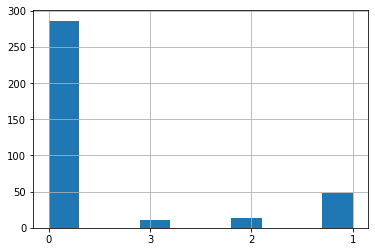

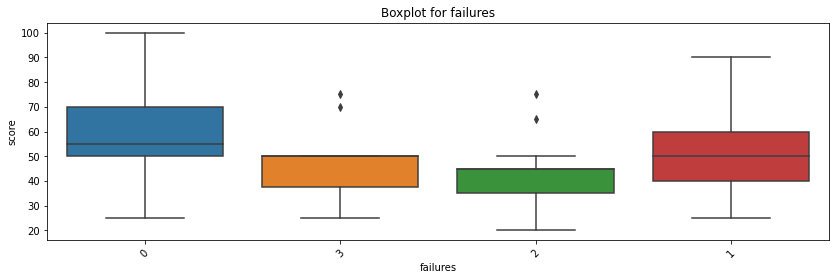

In [36]:
show_info('failures')

Сложно интерпретировать данные, поскольку 0 может означать как отсутствие неудач как таковых, так и их большое количество. Но так как сложно представить ситуацию когда ученик всегда удачлив, то можно отметить, что большинство крайне неудачные, но и лучше учатся)

no     322
yes     49
Name: schoolsup, dtype: int64
371


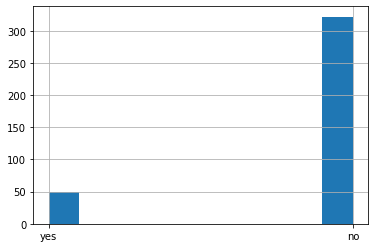

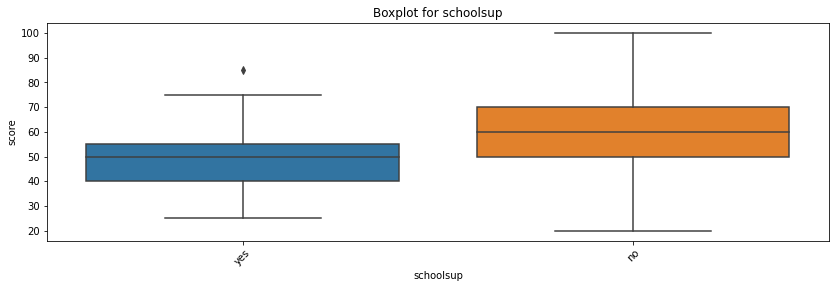

In [37]:
show_info('schoolsup')

Можно предположить, что дополнительная образовательная поддержка оказывается изначально слабоуспевающим ученикам.

yes    213
no     129
Name: famsup, dtype: int64
342


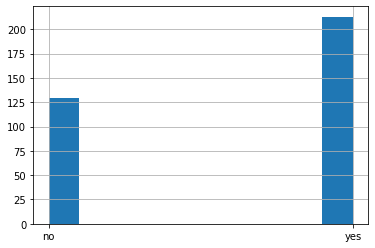

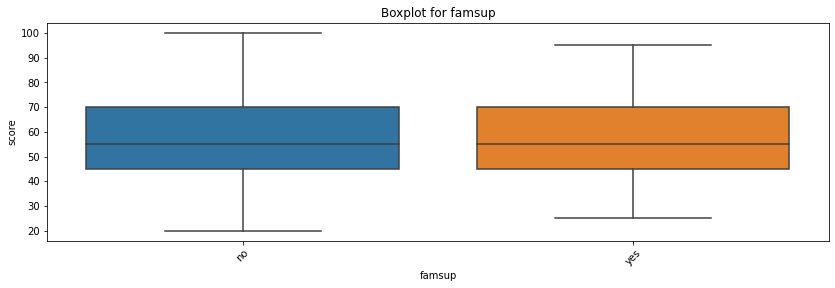

In [38]:
show_info('famsup')

no     191
yes    149
Name: paid, dtype: int64
340


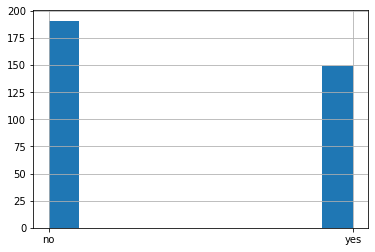

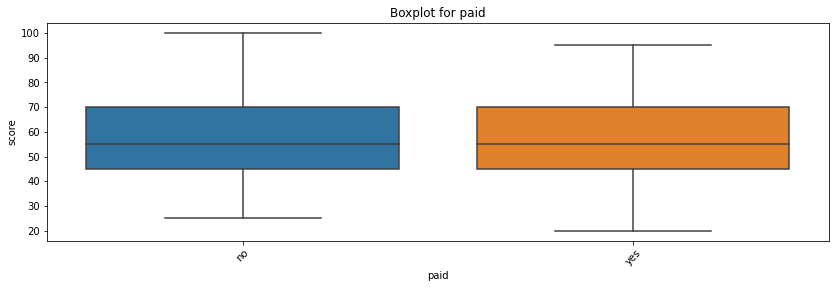

In [39]:
show_info('paid')

yes    189
no     176
Name: activities, dtype: int64
365


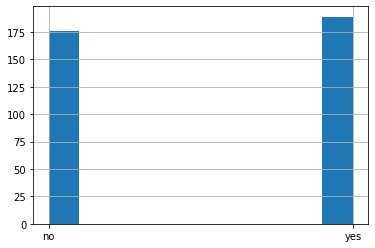

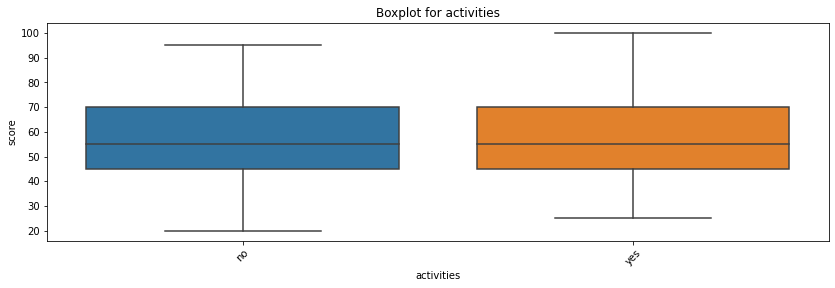

In [40]:
show_info('activities')

yes    292
no      73
Name: nursery, dtype: int64
365


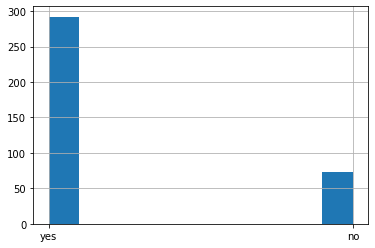

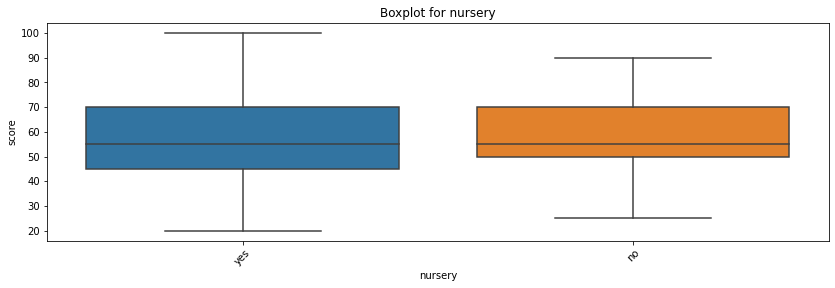

In [41]:
show_info('nursery')

yes    345
no      17
Name: higher, dtype: int64
362


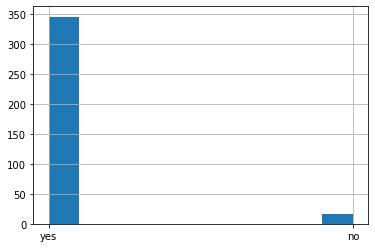

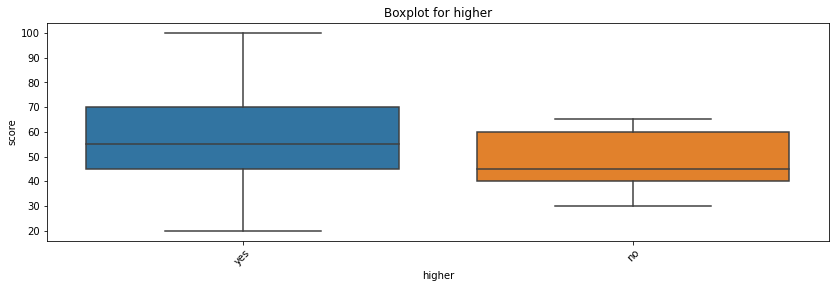

In [42]:
show_info('higher')

Мотивация что-то решает) Те, кто хочет получить высшее образование обычно получают по математике оценки лучше. Но сказать наверняка нельзя, поскольку выборка тех, кто не хочет получить высшее образование, весьма мала 

yes    294
no      51
Name: internet, dtype: int64
345


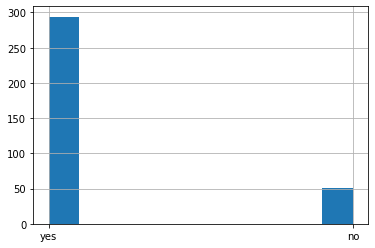

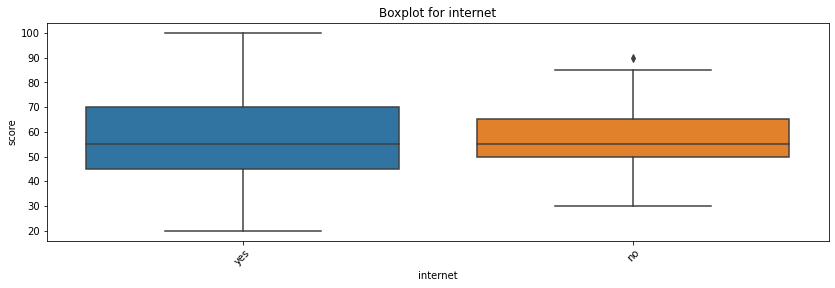

In [43]:
show_info('internet')

no     228
yes    120
Name: romantic, dtype: int64
348


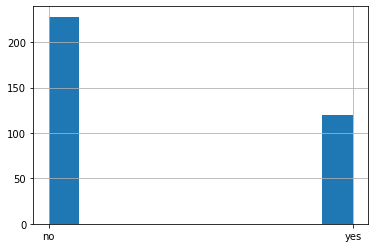

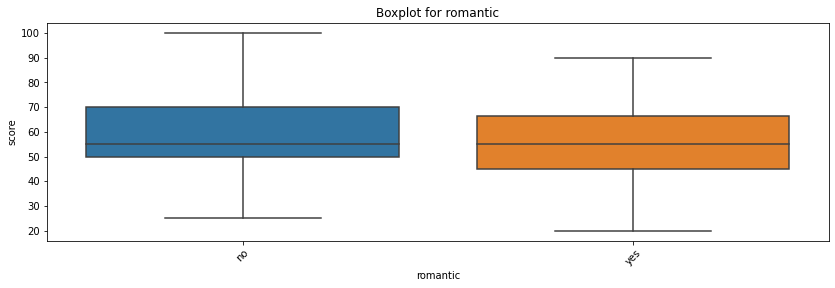

In [44]:
show_info('romantic')

Романтикам не до математики :)

4     176
5      92
3      59
2      17
1       7
-1      1
Name: famrel, dtype: int64
352


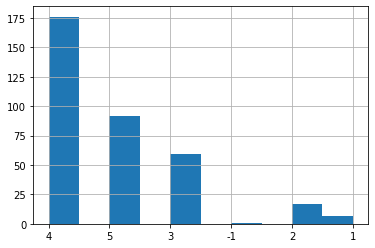

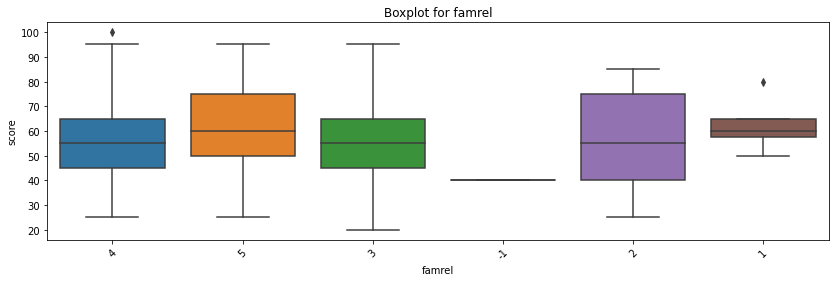

In [45]:
show_info('famrel')

Видно, что ученик с очень плохой оценкой из семьи, в которой плохие отношение. Выброс удалим

4    176
5     92
3     59
2     17
1      7
Name: famrel, dtype: int64
351


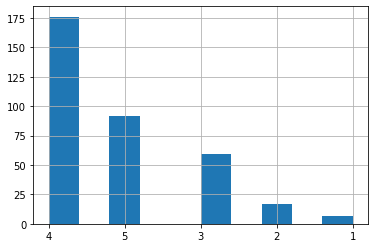

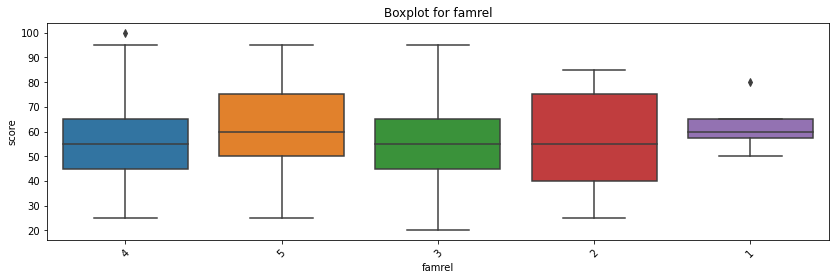

In [46]:
math = math[math.famrel != '-1']
show_info('famrel')

3    149
4    106
2     62
5     34
1     18
Name: freetime, dtype: int64
369


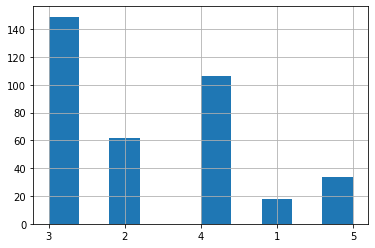

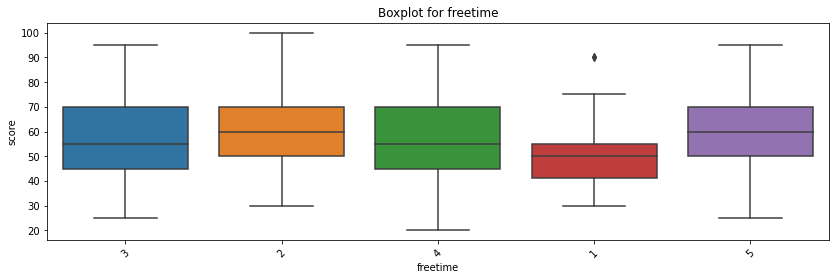

In [47]:
show_info('freetime')

Ученики с малым свободным временем обычно учатся хуже остальных. Но надо отметить, что таких учеников тоже мало

3    121
2     97
4     80
5     50
1     23
Name: goout, dtype: int64
371


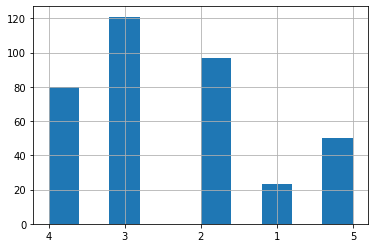

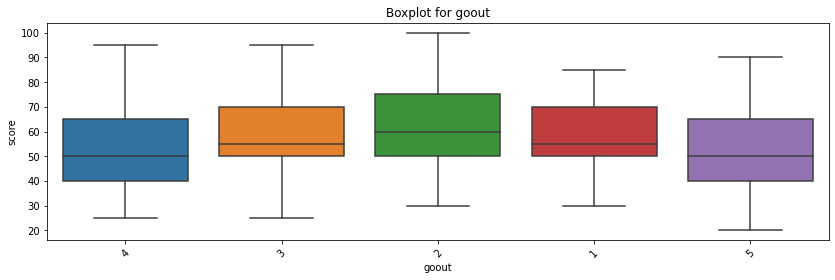

In [48]:
show_info('goout')

5    133
3     85
4     59
1     45
2     41
Name: health, dtype: int64
363


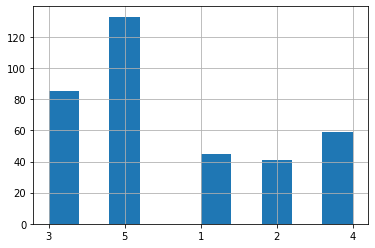

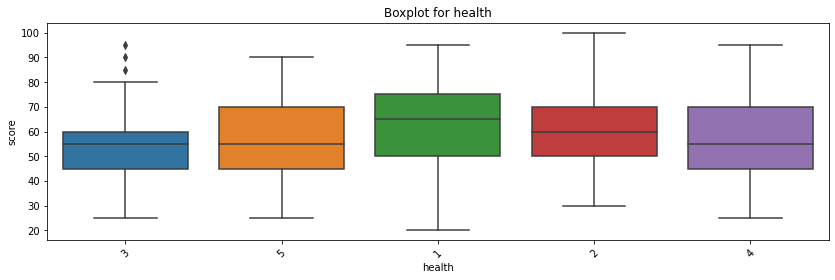

In [49]:
show_info('health')

Ученики с очень плохим здоровьем обычно учатся лучше. Интересно

0      107
4       62
2       58
6       30
8       19
10      17
12      12
14      11
16       6
3        6
7        6
5        5
18       5
20       4
9        3
22       3
1        3
11       2
13       2
15       2
385      1
75       1
19       1
21       1
23       1
24       1
25       1
26       1
28       1
30       1
38       1
40       1
54       1
56       1
17       1
Name: absences, dtype: int64
378


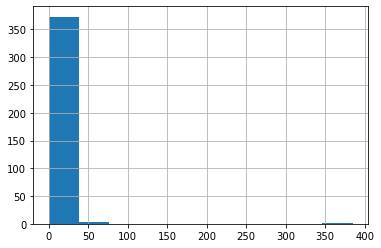

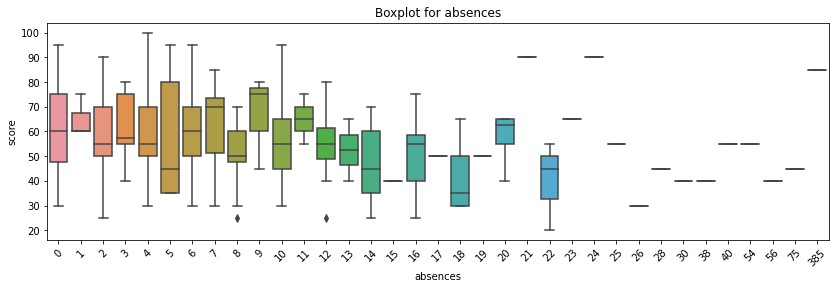

In [50]:
show_info('absences')

Много занятий пропускать не стоит, потому что с 10-11 пропуска намечается тренд на уменьшение оценки. Ученик, который не ходил в школу, вероятно обучался сам очень хорошо, или ему помогали. Проверим это.

In [51]:
math[math.absences == 385]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
221,GP,F,16,U,GT3,T,2,3,services,teacher,other,mother,1,2,0,yes,NaN,no,no,yes,yes,yes,no,2,3,1,3,385,85


Видно, что у этого ученика отец учитель и дополнительная образовательная поддержка

Поищем статистически значимые различия в номинативных признаках

In [52]:
list_of_columns = list(math.columns)
list_of_columns = list_of_columns[: len(list_of_columns)-2]
list_of_columns

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'health']

In [53]:
for col in list_of_columns:
    get_stat_dif(col)

Никаких статистически значимых различий не обнаружено :-( Хмм... Скорее всего, что-то не так. Что понять пока не получается. Проводил т-тест как до заполнения пропусков, так и после.

Добавляем вместо пустот "новые" значения, которые распределены также как уже имеющиеся.

In [54]:
for column in math.columns:
    if math[column].dtypes == object:
        adding_new_values(column)

In [55]:
math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 388
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      378 non-null    object
 1   sex         378 non-null    object
 2   age         378 non-null    int64 
 3   address     378 non-null    object
 4   famsize     378 non-null    object
 5   Pstatus     378 non-null    object
 6   Medu        378 non-null    object
 7   Fedu        378 non-null    object
 8   Mjob        378 non-null    object
 9   Fjob        378 non-null    object
 10  reason      378 non-null    object
 11  guardian    378 non-null    object
 12  traveltime  378 non-null    object
 13  studytime   378 non-null    object
 14  failures    378 non-null    object
 15  schoolsup   378 non-null    object
 16  famsup      378 non-null    object
 17  paid        378 non-null    object
 18  activities  378 non-null    object
 19  nursery     378 non-null    object
 20  higher    

In [56]:
# Поправим индексы
math.index = [i for i in range(378)]

Поработаем с числовыми переменными.

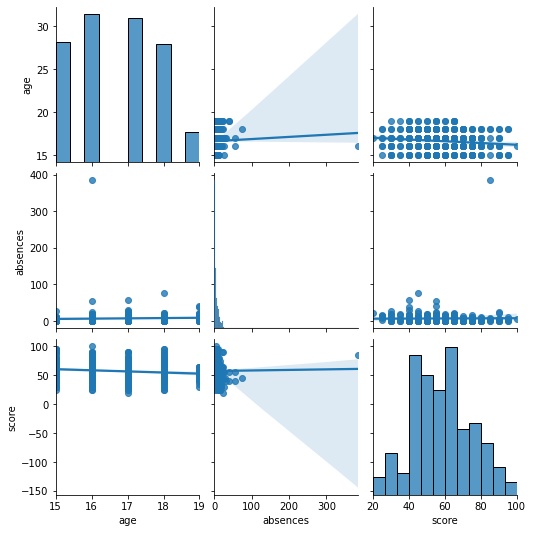

In [57]:
sns.pairplot(math, kind='reg')

In [58]:
math.corr()

,age,absences,score
age,1.000000,0.044478,-0.139825
absences,0.044478,1.000000,0.012399
score,-0.139825,0.012399,1.000000


Корреляция со score слабая. Удалим заметные выбросы в колонке absences

In [59]:
math = math[(math.absences != 385) & (
    math.absences != 21) & (math.absences != 24)]

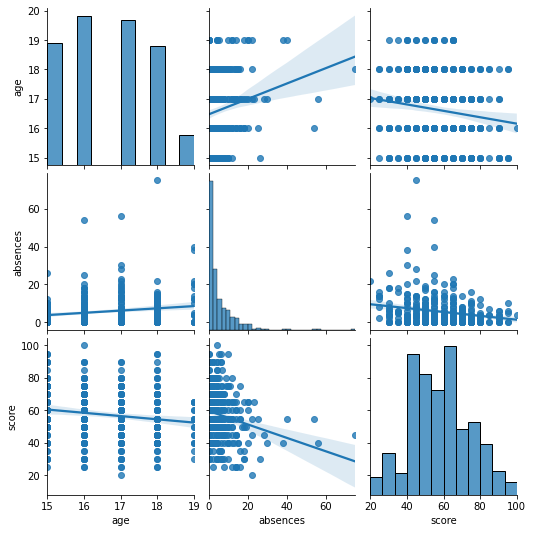

In [60]:
sns.pairplot(math, kind='reg')

In [61]:
math.corr()

,age,absences,score
age,1.000000,0.176738,-0.147806
absences,0.176738,1.000000,-0.205645
score,-0.147806,-0.205645,1.000000


Стало лучше. Удалим оставшиеся выбросы

In [62]:
IQR_absences = math['absences'].quantile(
    0.75) - math['absences'].quantile(0.25)
math['absences'] = math['absences'].apply(lambda x: math['absences'].median() if (x < (math['absences'].quantile(
    0.25) - 1.5*IQR_absences)) or (x > (math['absences'].quantile(0.75) + 1.5*IQR_absences)) else x)

<ipython-input-62-40eb2ca6e334>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math['absences'] = math['absences'].apply(lambda x: math['absences'].median() if (x < (math['absences'].quantile(


In [63]:
math.corr()

,age,absences,score
age,1.000000,0.151437,-0.147806
absences,0.151437,1.000000,-0.178986
score,-0.147806,-0.178986,1.000000


=> Корреляция немного снизилась, но на вид всё ещё достаточно заметна отрицательная корреляция пропусков с выличиной баллов на госэкзамене, что логично.

0.0     107
4.0      75
2.0      58
6.0      30
8.0      19
10.0     17
12.0     12
14.0     11
3.0       6
16.0      6
7.0       6
18.0      5
5.0       5
20.0      4
1.0       3
9.0       3
11.0      2
13.0      2
15.0      2
19.0      1
17.0      1
Name: absences, dtype: int64
375


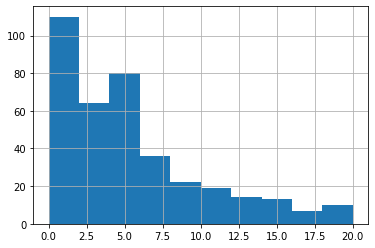

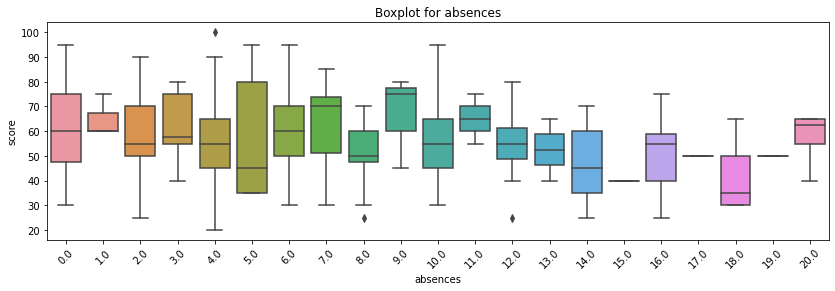

In [64]:
show_info('absences')

## Выводы:
    1. В данных мало пустых значений. Самый незаполненный столбец был незаполнен всего мнее, чем на 9%, другие и того полнее
    2. Пустые значение были заполнены равномерно существующими значениями в соответствующем соотношении
    3. Выбросов встретилось немного, все они либо обработаны, либо удалены
    4. Статистически значимых взаимосвязей в номинативных признаках почему-то не обнаружено. Похоже, что функция неправильно работает( Поясните почему, пожалуйста. Что нужно поправить?
    5. age и absence – коррелируемые числовые признаки. Некоррелируемых не обнаружено.
    6. Самые важные числовые параметры, которые пригодятся для построения модели – это age и abseces + какие-то номаниативные переменные, которые статистически значимые, но не определились.